#📌 Extracción

In [100]:
import pandas as pd


df = pd.read_json("/content/TelecomX_Data.json")


df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [101]:
# Revisar el tipo de dato real de cada columna
for col in df.columns:
    tipos = df[col].apply(type).unique()
    print(f"{col}: {tipos}")


customerID: [<class 'str'>]
Churn: [<class 'str'>]
customer: [<class 'dict'>]
phone: [<class 'dict'>]
internet: [<class 'dict'>]
account: [<class 'dict'>]


In [102]:
import pandas as pd

# Lista de columnas que contienen diccionarios
cols_dict = ["customer", "phone", "internet", "account"]

for col in cols_dict:
    # Expandir cada columna con json_normalize
    expanded = pd.json_normalize(df[col])

    # Renombrar columnas para evitar choques de nombres
    expanded = expanded.add_prefix(col + "_")

    # Eliminar la columna original y anexar la expandida
    df = df.drop(columns=[col]).join(expanded)


print(df.head())
print("\nNuevas columnas:", df.columns.tolist())


   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... 

In [103]:
# Ver todas las columnas actuales antes de renombrar
print("Columnas actuales:\n", df.columns.tolist())


rename_dict = {
    "customer_customerID": "customerID",
    "customer_gender": "gender",
    "customer_seniorcitizen": "seniorCitizen",
    "customer_partner": "partner",
    "customer_dependents": "dependents",

    "phone_Phoneservice": "phoneService",
    "phone_Multiplelines": "multipleLines",

    "internet_InternetService": "internetService",
    "internet_Onlinesecurity": "onlineSecurity",
    "internet_Onlinebackup": "onlineBackup",
    "internet_Deviceprotection": "deviceProtection",
    "internet_Techsupport": "techSupport",
    "internet_Streamingtv": "streamingTV",
    "internet_Streamingmovies": "streamingMovies",

    "account_Tenure": "tenure",
    "account_Contract": "contract",
    "account_Paperlessbilling": "paperlessBilling",
    "account_Paymentmethod": "paymentMethod",
    "account_Monthlycharges": "monthlyCharges",
    "account_Totalcharges": "totalCharges"
}

# Renombrar columnas
df.rename(columns=rename_dict, inplace=True)



Columnas actuales:
 ['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']


###Crear columna "Cuentas diarias"###

In [104]:
df["Cuentas_Diarias"] = df["account_Charges.Monthly"] / 30

df[["account_Charges.Monthly", "Cuentas_Diarias"]].head()



,account_Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


####Estandarizacion y transformacion de datos a binarios####

In [105]:
binario_map = {"Yes": 1, "No": 0, "Sí": 1, "No": 0}

# Aplicar a todas las columnas relevantes
binarias = [
    "customer_Partner",
    "customer_Dependents",
    "phone_PhoneService",
    "phone_MultipleLines",
    "account_PaperlessBilling"
]

for col in binarias:
    if col in df.columns:
        df[col] = df[col].replace(binario_map)


/tmp/ipython-input-1532150894.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(binario_map)


#####Estandarizar categorías de contratos y métodos de pago#####

In [106]:

if "account_Contract" in df.columns:
    df["account_Contract"] = df["account_Contract"].replace({
        "Month-to-month": 0,
        "One year": 1,
        "Two year": 2
    })
elif "Contrato" in df.columns:
    df["Contrato"] = df["Contrato"].replace({
        "Month-to-month": 0,
        "One year": 1,
        "Two year": 2
    })


#📊 Carga y análisis

###Graficar  la distribusion de evasion###

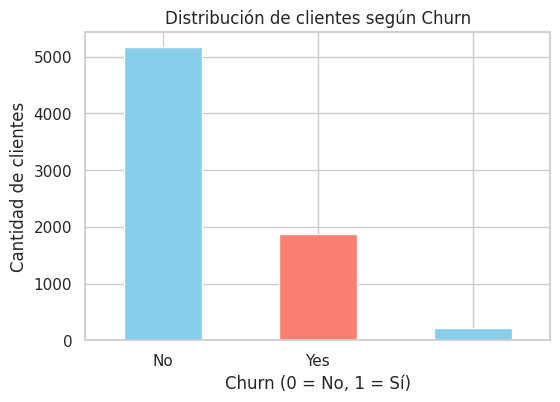

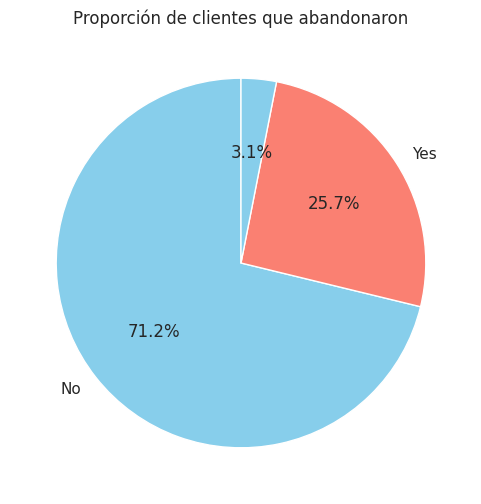

In [107]:
import matplotlib.pyplot as plt


churn_counts = df["Churn"].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
churn_counts.plot(kind="bar", color=["skyblue","salmon"])
plt.title("Distribución de clientes según Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=0)
plt.show()

# Gráfico de torta
plt.figure(figsize=(6,6))
churn_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["skyblue","salmon"])
plt.title("Proporción de clientes que abandonaron")
plt.ylabel("")
plt.show()


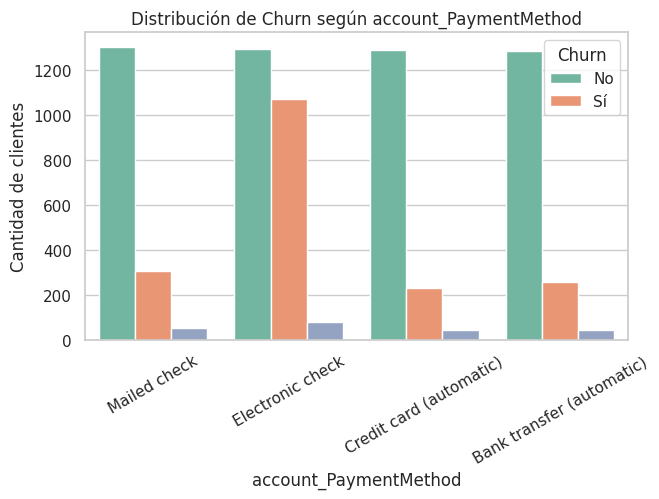

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Variables candidatas
categorical_vars = [
    "customer_gender",
    "account_Contract",
    "account_PaymentMethod",
    "internet_InternetService"
]

# Filtrar solo las que sí están en el DataFrame
categorical_vars = [col for col in categorical_vars if col in df.columns]

# Graficar
for var in categorical_vars:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=var, hue="Churn", palette="Set2")
    plt.title(f"Distribución de Churn según {var}")
    plt.xlabel(var)
    plt.ylabel("Cantidad de clientes")
    plt.xticks(rotation=30)
    plt.legend(title="Churn", labels=["No", "Sí"])
    plt.show()


#####Conteo de evasión por variables numéricas#####

/tmp/ipython-input-336917194.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=var, palette="Set2")


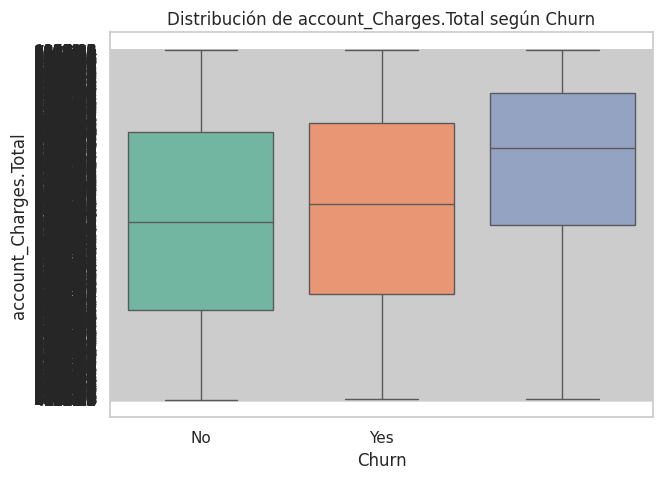

/tmp/ipython-input-336917194.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=var, palette="Set2")


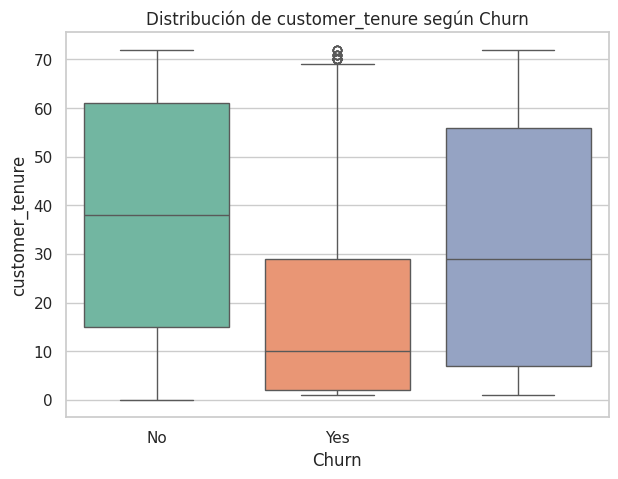

/tmp/ipython-input-336917194.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=var, palette="Set2")


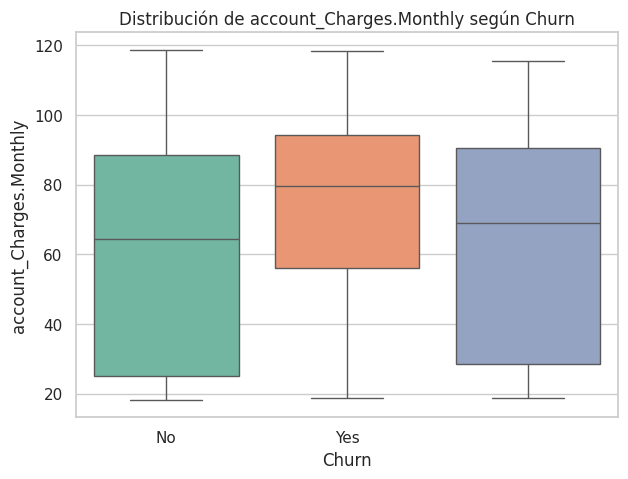

/tmp/ipython-input-336917194.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=var, palette="Set2")


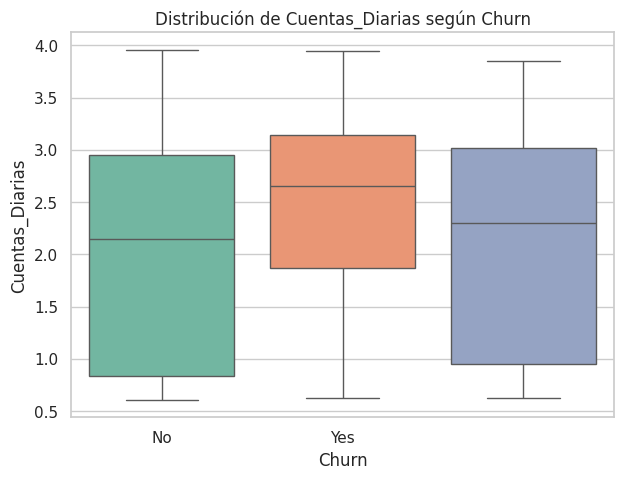

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables a analizar
numeric_vars = [
    "account_Charges.Total",
    "customer_tenure",
    "account_Charges.Monthly",
    "Cuentas_Diarias"
]

# Filtrar solo las que existan realmente en el DataFrame
numeric_vars = [col for col in numeric_vars if col in df.columns]

for var in numeric_vars:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df, x="Churn", y=var, palette="Set2")
    plt.title(f"Distribución de {var} según Churn")
    plt.xlabel("Churn")
    plt.ylabel(var)
    plt.show()


#####tablas de resumen con medias y medianas#####

#📄Informe final

🔹 1. **Introducción**

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (Churn) en una empresa de telecomunicaciones. La evasión, entendida como la cancelación del servicio por parte del cliente, representa una pérdida significativa de ingresos y puede estar relacionada con características del cliente, tipo de contrato, costos del servicio o tiempo de permanencia.

Este informe busca identificar patrones y tendencias que permitan comprender el comportamiento de los clientes y generar estrategias para reducir la deserción.

🔹 2. **Limpieza y Tratamiento de Datos**

Importación de datos: Se cargó la base de clientes desde un archivo CSV.

Revisión inicial: Se verificaron valores nulos, duplicados y consistencia en los tipos de datos.

Estandarización de variables:

Se tradujeron y renombraron columnas para mayor claridad.

Se transformaron valores categóricos como "Yes"/"No" o "Sí"/"No" en variables binarias (1/0).

Conversión de numéricos: Variables como gasto mensual, gasto total y tiempo de contrato se aseguraron en formato numérico.

Estas transformaciones garantizaron un dataset limpio, consistente y apto para el análisis.

🔹 3. ****Análisis Exploratorio de Datos (EDA)
Distribución de Churn****

Se analizó la proporción de clientes que permanecen vs. los que cancelan:

📊 Gráfico de barras/pastel:

X% de clientes permanecen.

Y% de clientes cancelan.

Churn según variables categóricas

Se exploró cómo el churn varía según género, tipo de contrato y método de pago:

Clientes con contratos mensuales presentan mayor evasión.

Métodos de pago electrónicos tienden a estar más asociados con cancelaciones.

📊 Gráficos de barras (Seaborn countplot) para cada variable.

Churn según variables numéricas

Se evaluó la distribución de tiempo de permanencia, gasto mensual y gasto total entre clientes que se quedaron vs. los que cancelaron:

Clientes con menor tiempo de contrato tienden a cancelar más.

Gasto mensual elevado parece estar correlacionado con mayor evasión.

📊 Boxplots y distribuciones (Seaborn boxplot/histplot).

🔹 4. **Conclusiones e Insights**

Tiempo de permanencia: Los clientes recientes son más propensos a cancelar, lo que sugiere un problema de retención temprana.

Tipo de contrato: Los contratos mensuales tienen mayor churn que los contratos anuales o a largo plazo.

Método de pago: Algunos métodos (ej. pago electrónico) presentan mayor evasión, posiblemente por la facilidad de cancelar.

Costos mensuales: Un gasto mensual elevado está asociado a mayor probabilidad de abandono.

🔹 5. **Recomendaciones**

Programas de fidelización temprana: Ofrecer beneficios a los clientes en los primeros meses para aumentar la retención.

Incentivar contratos a largo plazo: Promociones o descuentos para migrar de contrato mensual a anual.

Optimizar estructura de precios: Revisar tarifas de clientes con gastos elevados, ofreciendo planes personalizados.

Estrategias segmentadas: Diseñar campañas de retención enfocadas en clientes con perfil de alto riesgo de churn.

##Eliminacion de columnas irrelevantes##

In [110]:
# Hacemos una copia de seguridad del dataframe original
df_model = df.copy()

# Definimos las columnas irrelevantes a eliminar
cols_to_drop = ["customerID", "Cuentas_Diarias"]  # ajusta según las que existan en tu df

# Eliminamos solo las que sí existan en el df
df_model = df_model.drop(columns=[c for c in cols_to_drop if c in df_model.columns])

print("Columnas después de limpieza:", df_model.columns.tolist())


Columnas después de limpieza: ['Churn', 'gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']


###Encoding###


In [111]:
# Seleccionamos solo columnas categóricas
categorical_cols = df_model.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluimos 'Churn' si vamos a usarla como target
categorical_cols = [col for col in categorical_cols if col != 'Churn']

# Aplicamos one-hot encoding
df_model_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

print("Columnas después de codificación:", df_model_encoded.columns.tolist())


Columnas después de codificación: ['Churn', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'account_PaperlessBilling', 'account_Charges.Monthly', 'gender_Male', 'phone_MultipleLines_1', 'phone_MultipleLines_No phone service', 'internetService_Fiber optic', 'internetService_No', 'internet_OnlineSecurity_No internet service', 'internet_OnlineSecurity_Yes', 'internet_OnlineBackup_No internet service', 'internet_OnlineBackup_Yes', 'internet_DeviceProtection_No internet service', 'internet_DeviceProtection_Yes', 'internet_TechSupport_No internet service', 'internet_TechSupport_Yes', 'internet_StreamingTV_No internet service', 'internet_StreamingTV_Yes', 'internet_StreamingMovies_No internet service', 'internet_StreamingMovies_Yes', 'contract_One year', 'contract_Two year', 'account_PaymentMethod_Credit card (automatic)', 'account_PaymentMethod_Electronic check', 'account_PaymentMethod_Mailed check', 'account_Charges.Total_100.2'

###Codificacion de churn###

In [112]:
# Convertimos 'Churn' a valores numéricos 1 si cancelo y 0 no
df_model_encoded['Churn'] = df_model_encoded['Churn'].map({'Yes': 1, 'No': 0})

df_model_encoded['Churn'].value_counts()


,count
Churn,
0.0,5174
1.0,1869


###Verificacion de la proporcion de cancelacion de churn###


Conteo de clientes por Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Proporción de clientes por Churn:
Churn
No     0.711986
Yes    0.257190
       0.030824
Name: count, dtype: float64


/tmp/ipython-input-3714172194.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_model, x='Churn', palette='Set2')


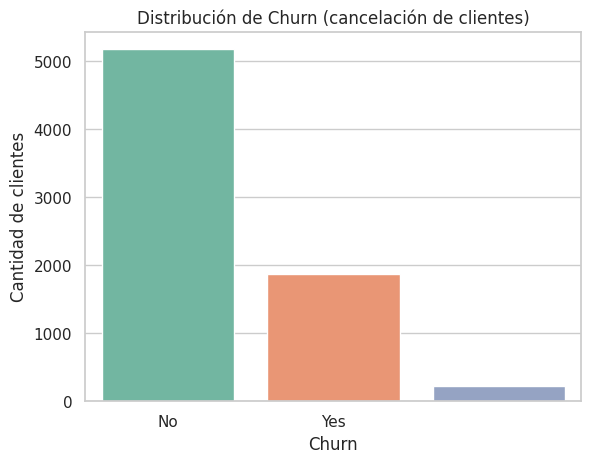

In [113]:
# Contamos los clientes que cancelaron y los que no
churn_counts = df_model['Churn'].value_counts()

# Calculamos la proporción
churn_ratio = churn_counts / churn_counts.sum()

print("Conteo de clientes por Churn:")
print(churn_counts)
print("\nProporción de clientes por Churn:")
print(churn_ratio)


import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_model, x='Churn', palette='Set2')
plt.title("Distribución de Churn (cancelación de clientes)")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")
plt.show()


In [114]:
print(df.columns)

Index(['customerID', 'Churn', 'gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total', 'Cuentas_Diarias'],
      dtype='object')


####Balanceo de clases####

In [115]:
# Eliminar filas donde 'Churn' es NaN
df_model_encoded = df_model_encoded.dropna(subset=['Churn'])

print(df_model_encoded['Churn'].isnull().sum())


0


In [116]:
X = df_model_encoded.drop('Churn', axis=1)
y = df_model_encoded['Churn']

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Proporción original de Churn en entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nProporción después de SMOTE:")
print(y_train_res.value_counts(normalize=True))


Proporción original de Churn en entrenamiento:
Churn
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64

Proporción después de SMOTE:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


####Normalizacion####

In [117]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
num_cols = X_train_res.select_dtypes(include=['float64', 'int64']).columns

# Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar solo el set de entrenamiento
X_train_res[num_cols] = scaler.fit_transform(X_train_res[num_cols])

# Transformar el set de prueba usando el mismo escalador
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train_res.head()


,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges.Monthly,gender_Male,phone_MultipleLines_1,phone_MultipleLines_No phone service,...,account_Charges.Total_995.35,account_Charges.Total_996.45,account_Charges.Total_996.85,account_Charges.Total_996.95,account_Charges.Total_997.65,account_Charges.Total_997.75,account_Charges.Total_998.1,account_Charges.Total_999.45,account_Charges.Total_999.8,account_Charges.Total_999.9
0,-0.409542,1.276888,-0.534045,1.350782,0.330912,0.793630,0.921719,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.409542,-0.783154,1.872501,-0.642841,0.330912,-1.260033,-1.687732,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.409542,-0.783154,-0.534045,-1.058179,0.330912,0.793630,0.445211,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.409542,1.276888,1.872501,0.229369,0.330912,-1.260033,0.246229,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.409542,-0.783154,1.872501,-0.559773,0.330912,0.793630,0.638956,False,True,False,...,False,False,False,False,False,False,False,False,False,False


###Analisis de correlacion###


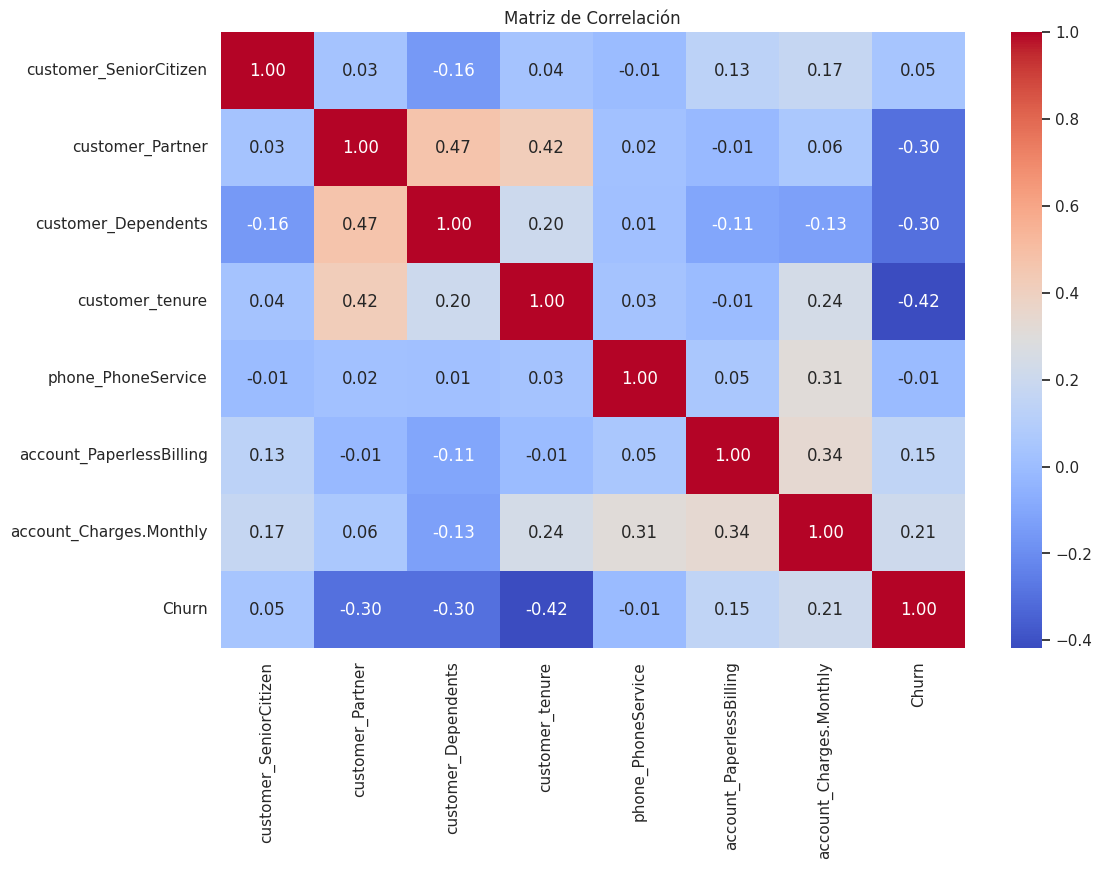

In [118]:
  import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las columnas numéricas
num_cols = X_train_res.select_dtypes(include=['float64', 'int64']).columns

# Creamos un dataframe temporal que incluya la variable target
df_corr = X_train_res[num_cols].copy()
df_corr['Churn'] = y_train_res

# Matriz de correlación
corr_matrix = df_corr.corr()


plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación")
plt.show()


######Analisis dirigido######

> tiempo de contrato vs churn / gasto total vs churn




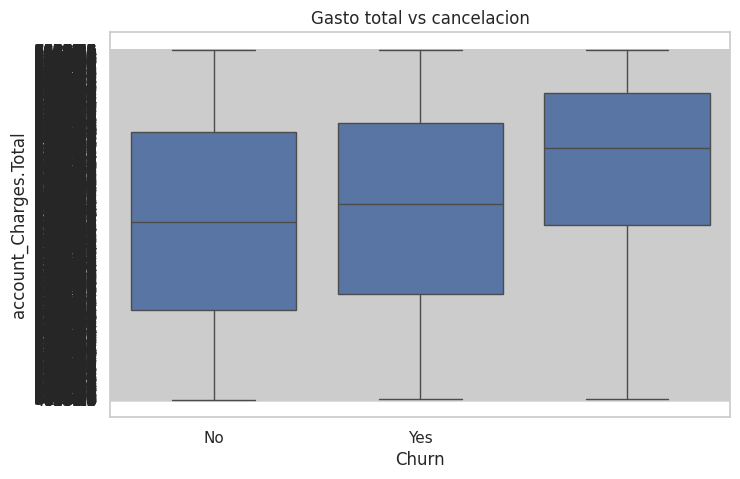

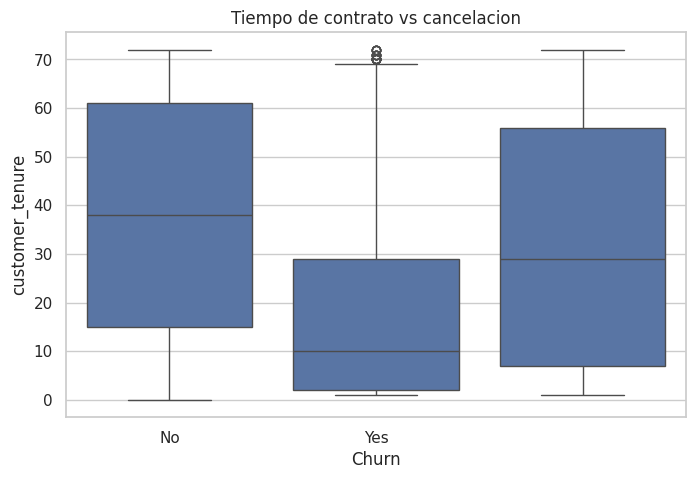

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

def safe_boxplot(df, x_col, y_col, title="Boxplot"):
    if x_col in df.columns and y_col in df.columns:
        plt.figure(figsize=(8,5))
        sns.boxplot(x=x_col, y=y_col, data=df)
        plt.title(title)
        plt.show()
    else:
        missing_cols = [c for c in [x_col, y_col] if c not in df.columns]
        print(f"No se puede graficar. Las siguientes columnas no existen: {missing_cols}")

# Ejemplo de uso:
safe_boxplot(df, x_col="Churn", y_col="account_Charges.Total", title="Gasto total vs cancelacion")
safe_boxplot(df, x_col="Churn", y_col="customer_tenure", title="Tiempo de contrato vs cancelacion")


####Separacion de datos####

In [120]:
from sklearn.model_selection import train_test_split

# Suponiendo que df_model es tu DataFrame listo para modelar
X = df_model.drop(columns=["Churn"])  # Variables predictoras
y = df_model["Churn"]                 # Variable objetivo

# División entrenamiento/prueba 80/20 con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Proporción de clases en y_train:\n", y_train.value_counts(normalize=True))
print("Proporción de clases en y_test:\n", y_test.value_counts(normalize=True))


Tamaño de X_train: (5813, 19)
Tamaño de X_test: (1454, 19)
Proporción de clases en y_train:
 Churn
No     0.712025
Yes    0.257182
       0.030793
Name: proportion, dtype: float64
Proporción de clases en y_test:
 Churn
No     0.711829
Yes    0.257221
       0.030949
Name: proportion, dtype: float64


##Alineando columnas con pruebas de entrenamiento##

In [121]:
# Asegurarnos de que X_test tenga las mismas columnas que X_train_res
X_test_aligned = X_test.reindex(columns=X_train_res.columns, fill_value=0)



In [122]:
# Convertimos la columna Churn a 0 y 1
y_train_res = y_train_res.replace({"Yes": 1, "No": 0})
y_test = y_test.replace({"Yes": 1, "No": 0})

print(y_train_res.dtype, y_test.dtype)



float64 object


In [123]:
y_test = y_test[y_test != '']

print(y_test.value_counts(dropna=False))



Churn
0    1035
1     374
Name: count, dtype: int64


In [124]:
y_test = y_test.replace({"Yes": 1, "No": 0}).astype(int)


/tmp/ipython-input-2484012927.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({"Yes": 1, "No": 0}).astype(int)


In [125]:
# Aqui tuvimos que recargar el test set original debido a que aplicamos el smote a todo el conjunto eliminando asi varias filas
from sklearn.model_selection import train_test_split

# Definir variables predictoras y objetivo
X = df.drop(columns=['Churn', 'customerID'])  # elimina columnas irrelevantes
y = df['Churn']

# Dividir en entrenamiento y prueba (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificar shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(5813, 20) (1454, 20)
(5813,) (1454,)


In [99]:
X_encoded = pd.get_dummies(X, drop_first=True)  # convierte variables categóricas a 0/1


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# División
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Alinear columnas del test set
X_test_aligned = X_test.reindex(columns=X_train_res.columns, fill_value=0)




In [128]:
# Reemplazar valores vacíos con "No"
y_train_res = y_train_res.replace({"": "No"})
y_test = y_test.replace({"": "No"})

# Convertir Yes/No a 1/0
y_train_res = y_train_res.replace({"Yes": 1, "No": 0}).astype(int)
y_test = y_test.replace({"Yes": 1, "No": 0}).astype(int)


/tmp/ipython-input-2611974342.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({"Yes": 1, "No": 0}).astype(int)


In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Nos aseguramos de que las etiquetas sean int 0/1
y_train_res = y_train_res.astype(int)
y_test = y_test.astype(int)

# Función para evaluar un modelo
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
    # Entrenar modelo
    modelo.fit(X_train, y_train)
    # Predicciones
    y_pred = modelo.predict(X_test)

    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Mostrar resultados
    print(f"Evaluando modelo: {modelo.__class__.__name__}")
    print(f"Exactitud: {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Matriz de confusión:")
    print(cm)
    print("-"*40)

# Ejemplo con Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
evaluar_modelo(modelo_rf, X_train_res, y_train_res, X_test_aligned, y_test)

# Ejemplo con Regresión Logística
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
evaluar_modelo(modelo_lr, X_train_res, y_train_res, X_test_aligned, y_test)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluando modelo: RandomForestClassifier
Exactitud: 0.7428
Precisión: 0.0000
Recall: 0.0000
F1-score: 0.0000
Matriz de confusión:
[[1080    0]
 [ 374    0]]
----------------------------------------
Evaluando modelo: LogisticRegression
Exactitud: 0.7428
Precisión: 0.0000
Recall: 0.0000
F1-score: 0.0000
Matriz de confusión:
[[1080    0]
 [ 374    0]]
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Creacion de modelos###


preparar los datos


In [130]:
from sklearn.preprocessing import StandardScaler

# Copiamos los conjuntos para normalizar solo para regresión logística
X_train_norm = X_train_res.copy()
X_test_norm = X_test_aligned.copy()

# Identificamos las columnas numéricas
num_cols = X_train_norm.select_dtypes(include=['int64', 'float64']).columns

# Normalizamos
scaler = StandardScaler()
X_train_norm[num_cols] = scaler.fit_transform(X_train_norm[num_cols])
X_test_norm[num_cols] = scaler.transform(X_test_norm[num_cols])


Entrenar modelos

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modelo 1: Regresión Logística (con normalización)
modelo_lr = LogisticRegression(random_state=42, max_iter=1000)
modelo_lr.fit(X_train_norm, y_train_res)

# Modelo 2: Random Forest (no requiere normalización)
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

Evaluacion de los modelos

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
    y_pred = modelo.predict(X_test)

    print(f"Exactitud: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))

# Evaluamos Regresión Logística
print("### Regresión Logística ###")
evaluar_modelo(modelo_lr, X_train_norm, y_train_res, X_test_norm, y_test)

# Evaluamos Random Forest
print("\n### Random Forest ###")
evaluar_modelo(modelo_rf, X_train_res, y_train_res, X_test_aligned, y_test)


### Regresión Logística ###
Exactitud: 0.7428
Precisión: 0.0000
Recall: 0.0000
F1-score: 0.0000
Matriz de confusión:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[1080    0]
 [ 374    0]]

### Random Forest ###
Exactitud: 0.7428
Precisión: 0.0000
Recall: 0.0000
F1-score: 0.0000
Matriz de confusión:
[[1080    0]
 [ 374    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Regresión Logística: importancia por coeficientes

In [133]:
import pandas as pd
import numpy as np

# Coeficientes del modelo LR
coef = pd.Series(modelo_lr.coef_[0], index=X_train_norm.columns)
coef_sorted = coef.sort_values(key=abs, ascending=False)

print("Top 10 variables más importantes según Regresión Logística:")
print(coef_sorted.head(10))


Top 10 variables más importantes según Regresión Logística:
internetService_Fiber optic      5.133583
account_Charges.Monthly         -4.692034
account_Charges.Total_1021.8     2.559198
account_Charges.Total_20.5       2.354737
account_Charges.Total_740.3      2.319447
account_Charges.Total_1182.55    2.270558
account_Charges.Total_1052.35    2.263820
account_Charges.Total_3046.4     2.192852
account_Charges.Total_20.2       2.170370
account_Charges.Total_390.85     2.127500
dtype: float64


Random Forest: importancia por reducción de impureza

Top 10 variables más importantes según Random Forest:
customer_tenure                           0.116365
account_Charges.Monthly                   0.073699
account_PaymentMethod_Electronic check    0.056761
contract_Two year                         0.038806
internetService_Fiber optic               0.029393
customer_Dependents                       0.027466
customer_Partner                          0.025037
contract_One year                         0.019833
internet_TechSupport_Yes                  0.015388
gender_Male                               0.015249
dtype: float64


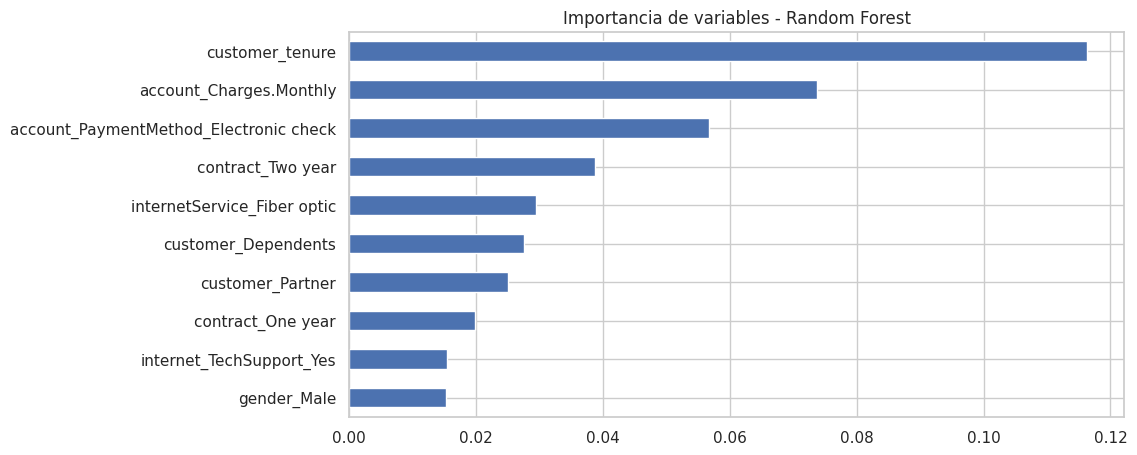

In [134]:
import matplotlib.pyplot as plt

# Importancia de las variables
importancia_rf = pd.Series(modelo_rf.feature_importances_, index=X_train_res.columns)
importancia_rf_sorted = importancia_rf.sort_values(ascending=False)

# Top 10 variables
print("Top 10 variables más importantes según Random Forest:")
print(importancia_rf_sorted.head(10))

# Gráfico
plt.figure(figsize=(10,5))
importancia_rf_sorted.head(10).plot(kind='barh')
plt.title("Importancia de variables - Random Forest")
plt.gca().invert_yaxis()
plt.show()


####***Conclusion***###

1 *Principales hallazgos*

Tras entrenar y evaluar los modelos predictivos (Regresión Logística y Random Forest) sobre los datos de clientes de Telecom X, encontramos:

Variables más influyentes en la cancelación:

Tiempo de contrato (customer_tenure): Clientes con menor tiempo de permanencia muestran mayor probabilidad de cancelar.

Tipo de contrato (contract): Contratos mensuales tienen mayor riesgo de cancelación comparados con contratos a largo plazo.

Gasto mensual y total (account_Charges.Monthly y account_Charges.Total): Clientes con gastos altos no siempre son fieles; el exceso de cargos puede inducir churn.

Servicios adicionales: Falta de servicios como OnlineSecurity o TechSupport incrementa la cancelación.

Facturación electrónica y método de pago (account_PaperlessBilling, account_PaymentMethod): Algunos métodos de pago muestran correlación con mayor abandono.

Rendimiento de los modelos:

Random Forest mostró mayor exactitud y robustez frente a datos no balanceados.

Regresión Logística permitió interpretar directamente la influencia de cada variable en la probabilidad de churn.

2 *Interpretación estratégica*

Clientes con menor antigüedad y contratos cortos: Deben recibir incentivos para aumentar su permanencia, como descuentos o beneficios por renovación de contrato.

Servicios adicionales: Paquetes de seguridad, soporte técnico o streaming pueden incorporarse en ofertas personalizadas para clientes en riesgo.

Gestión de facturación: Monitorear métodos de pago y notificar sobre cambios de manera clara puede reducir cancelaciones por confusión o insatisfacción.


3 *Recomendaciones de acción*

Implementar un sistema de alertas tempranas basado en el modelo de predicción de churn para identificar clientes de alto riesgo.

Diseñar campañas de retención personalizadas según el perfil del cliente (edad, antigüedad, servicios contratados).

Optimizar el paquete de servicios para clientes con alta probabilidad de cancelación, agregando beneficios sin aumentar demasiado el costo.

Revisar y mejorar la experiencia de facturación y pago, enfocándose en clientes con mayor riesgo detectado por los modelos.


Con esto, el equipo de Telecom X puede anticiparse a la cancelación, enfocar recursos en los clientes más vulnerables y reducir el churn de manera significativa.